# Welcome to one of our "Getting Started" competitions 👋

This particular challenge is perfect for data scientists looking to get started with Natural Language Processing. The competition dataset is not too big, and even if you don’t have much personal computing power, you can do all of the work in our free, no-setup, Jupyter Notebooks environment called Kaggle Notebooks.

## Competition Description

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster. Take this example:


The author explicitly uses the word “ABLAZE” but means it metaphorically. This is clear to a human right away, especially with the visual aid. But it’s less clear to a machine.

In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. If this is your first time working on an NLP problem, we've created a quick tutorial to get you up and running.

Disclaimer: The dataset for this competition contains text that may be considered profane, vulgar, or offensive.

## Acknowledgments

This dataset was created by the company figure-eight and originally shared on their ‘Data For Everyone’ website here.

Tweet source: https://twitter.com/AnyOtherAnnaK/status/629195955506708480

## Challenge 

Your task is to predict which Tweets are about real disasters and which one’s aren’t. If you predict a 1, the tweet is about a real disaster. If you predict a 0, the tweet is not.

## Data Preprocessing 


### Load the data 

Let's start by loading the data and taking a look at the first few rows.

In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
root = '/kaggle/input/nlp-getting-started'

train = pd.read_csv(f'{root}/train.csv')
test = pd.read_csv(f'{root}/test.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Handle missing values

Let's check for missing values in the dataset.

In [3]:
# check for missing values and ratio of missing values
train.isnull().sum() / len(train)

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

It appears that :

- 0.8% of the `keyword` column is missing
- 33.3% of the `location` column is missing

Before deciding on a strategy to handle missing values, let's see how many unique values there are in the `keyword` and `location` columns.

In [4]:
# how many unique values are there in keyword and location?

print('Number of unique values in keyword: ', train['keyword'].nunique())
print('Number of unique values in location: ', train['location'].nunique())

Number of unique values in keyword:  221
Number of unique values in location:  3341


In [5]:
# what are these unique values?

print('Unique values in keyword: ', train['keyword'].unique())
print('Unique values in location: ', train['location'].unique())

Unique values in keyword:  [nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'd

As we can see there are a lot of unique values in the `keyword` and `location` columns. Because `location` is user-generated, there are a lot of different ways to describe the same location. For example, "New York" and "NY" are two different ways to describe the same location. Because of this, we will drop the `location` column.

For the `keyword` column, we will fill in the missing values with the string "no_keyword".

In [6]:
# drop the location column

train = train.drop(['location'], axis=1)
test = test.drop(['location'], axis=1)

# impute missing values in keyword with 'no_keyword'

train['keyword'] = train['keyword'].fillna('no_keyword')
test['keyword'] = test['keyword'].fillna('no_keyword')

In [7]:
# get stopwords

import nltk

nltk.download('stopwords')
import string

from nltk.corpus import stopwords

stopwords = stopwords.words('english')

# remove stopwords from the text

train['text'] = train['text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stopwords)])
)
test['text'] = test['text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stopwords)])
)

# create a new column with the number of words in each tweet

train['num_words'] = train['text'].apply(lambda x: len(str(x).split()))
test['num_words'] = test['text'].apply(lambda x: len(str(x).split()))

# create a new column with the number of characters in each tweet

train['num_chars'] = train['text'].apply(lambda x: len(str(x)))
test['num_chars'] = test['text'].apply(lambda x: len(str(x)))

# create a new column with the number of stopwords in each tweet

train['num_stopwords'] = train['text'].apply(
    lambda x: len([w for w in str(x).lower().split() if w in stopwords])
)
test['num_stopwords'] = test['text'].apply(
    lambda x: len([w for w in str(x).lower().split() if w in stopwords])
)

# create a new column with the number of punctuations in each tweet

train['num_punctuations'] = train['text'].apply(
    lambda x: len([c for c in str(x) if c in string.punctuation])
)
test['num_punctuations'] = test['text'].apply(
    lambda x: len([c for c in str(x) if c in string.punctuation])
)

# create a new column with the number of hashtags in each tweet

train['num_hashtags'] = train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
test['num_hashtags'] = test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# create a new column with the number of mentions in each tweet

train['num_mentions'] = train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
test['num_mentions'] = test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))


# remove URLs from the text

train['text'] = train['text'].apply(
    lambda x: ' '.join([word for word in x.split() if 'http' not in word])
)
test['text'] = test['text'].apply(
    lambda x: ' '.join([word for word in x.split() if 'http' not in word])
)

# remove HTML tags from the text

train['text'] = train['text'].apply(
    lambda x: ' '.join([word for word in x.split() if '<' not in word])
)
test['text'] = test['text'].apply(
    lambda x: ' '.join([word for word in x.split() if '<' not in word])
)

# remove emojis from the text

train['text'] = train['text'].apply(
    lambda x: ' '.join([word for word in x.split() if ':' not in word])
)
test['text'] = test['text'].apply(
    lambda x: ' '.join([word for word in x.split() if ':' not in word])
)

# remove numbers from the text

train['text'] = train['text'].apply(
    lambda x: ' '.join([word for word in x.split() if not word.isdigit()])
)
test['text'] = test['text'].apply(
    lambda x: ' '.join([word for word in x.split() if not word.isdigit()])
)
train['text'] = train['text'].apply(
    lambda x: ' '.join([word for word in x.split() if not word.isnumeric()])
)
test['text'] = test['text'].apply(
    lambda x: ' '.join([word for word in x.split() if not word.isnumeric()])
)

# remove punctuation from the text

train['text'] = train['text'].str.replace(r'[^\w\s]', '')
test['text'] = test['text'].str.replace(r'[^\w\s]', '')

# remove stopwords from the text

train['text'] = train['text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stopwords)])
)
test['text'] = test['text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stopwords)])
)


# remove short words from the text

train['text'] = train['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
test['text'] = test['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))


# create a new column with the number of words in each tweet

train['num_words'] = train['text'].apply(lambda x: len(str(x).split()))
test['num_words'] = test['text'].apply(lambda x: len(str(x).split()))

# create a new column with the number of characters in each tweet

train['num_chars'] = train['text'].apply(lambda x: len(str(x)))
test['num_chars'] = test['text'].apply(lambda x: len(str(x)))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:104: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:105: FutureWarning: The default value of regex will change from True to False in a future version.


## Exploratory Data Analysis


### Overview of the data

Let's check the shape of the data.

In [8]:
train.shape, test.shape

((7613, 10), (3263, 9))

Let's take a look at the distribution of the target variable within the training set.



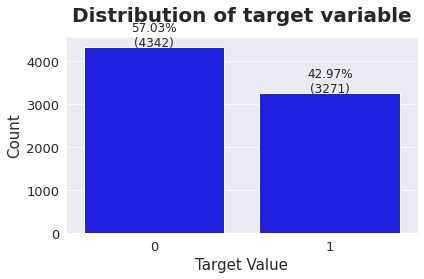

In [9]:
# plot the distribution of the target variable
sns.set_style("darkgrid")
ax = sns.countplot(data=train, x='target', color='blue')

total = float(len(train))
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 3,
        f'{100 * height / total:1.2f}%\n({int(height):d})',
        ha="center",
        fontsize=12,
    )

plt.title('Distribution of target variable', fontsize=20, fontweight='bold', y=1.05)
plt.xlabel('Target Value', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()

plt.show()

We can see that the training consists of 57% non-disaster tweets and 43% disaster tweets. This is a fairly balanced dataset, so we don't have to worry about class imbalance.

### Text Data Analysis

#### Number of Characters within Tweets

Let's take a look at the number of characters within the tweets.


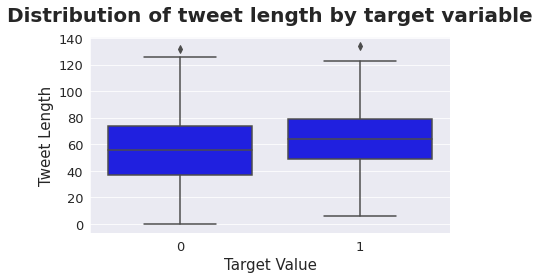

In [10]:
# create a plot showing the number of characters in each tweet grouped by the target variable

train['length'] = train['text'].apply(len)

sns.set_style("darkgrid")
ax = sns.boxplot(data=train, x='target', y='length', color='blue')

plt.title('Distribution of tweet length by target variable', fontsize=20, fontweight='bold', y=1.05)
plt.xlabel('Target Value', fontsize=15)
plt.ylabel('Tweet Length', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()

plt.show()

As we can see, the distribution of the number of characters within the tweets is fairly similar for both classes. However, we can see that the median number of characters is higher for disaster tweets. This could be a useful feature for our model.


#### Histogram of the length of the text data to check for outliers

To check for outliers, let's plot a histogram of the length of the text data.

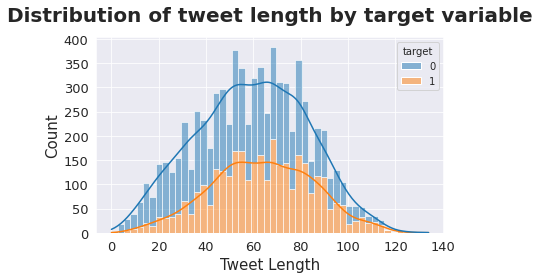

In [11]:
# plot a histogram of the length of tweets to check for outliers, group by target variable

sns.set_style("darkgrid")
ax = sns.histplot(
    data=train, x='length', hue='target', multiple='stack', bins=50, color='blue', kde=True
)

plt.title('Distribution of tweet length by target variable', fontsize=20, fontweight='bold', y=1.05)
plt.xlabel('Tweet Length', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()

plt.show()

This plot shows us that the distribution of the length of the text data is fairly similar for both classes. 

#### Most frequent words 

Let's take a look at the most frequent words within the tweets. We will use the `wordcloud` library to create wordclouds for both classes.

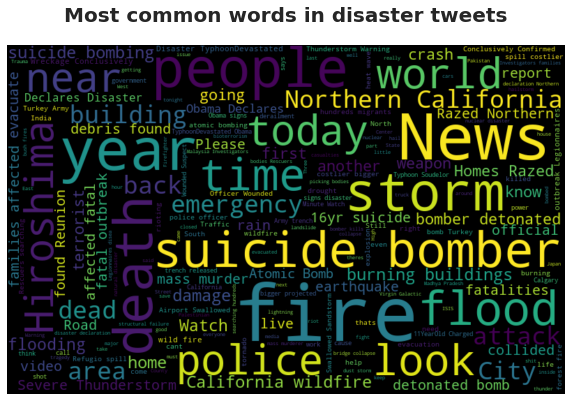

In [12]:
# create wordclouds for each target value

from wordcloud import WordCloud

disaster_tweets = train[train['target'] == 1]['text']
non_disaster_tweets = train[train['target'] == 0]['text']

disaster_tweets = ' '.join(disaster_tweets)
non_disaster_tweets = ' '.join(non_disaster_tweets)

disaster_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(
    disaster_tweets
)
non_disaster_wordcloud = WordCloud(
    width=800, height=500, random_state=21, max_font_size=110
).generate(non_disaster_tweets)

plt.figure(figsize=(10, 7))
plt.imshow(disaster_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most common words in disaster tweets', fontsize=20, fontweight='bold', y=1.05)
plt.show()

#### plot a bar chart of the top 20 most frequent words

Let's plot a bar chart of the top 20 most frequent words for both classes.

In [13]:
# plot two bar charts showing the most common words in each target value

from collections import Counter


def create_corpus(target):
    corpus = []

    for x in train[train['target'] == target]['text'].str.split():
        corpus.extend(iter(x))
    return corpus


def create_df(corpus, n=None):
    obj = Counter(corpus)
    df = pd.DataFrame(obj.most_common(n))
    df.columns = ['Common_words', 'count']
    return df


# top 10 most common words in disaster tweets
corpus = create_corpus(1)
df = create_df(corpus).head(10)
df.style.background_gradient(cmap='Blues')

,Common_words,count
0,fire,126
1,California,98
2,people,94
3,killed,87
4,like,86
5,Hiroshima,82
6,News,79
7,suicide,76
8,disaster,72
9,fires,72


In [14]:
# top 10 words in non-disaster tweets
corpus = create_corpus(0)
df = create_df(corpus).head(10)
df.style.background_gradient(cmap='Blues')

,Common_words,count
0,like,235
1,would,87
2,know,77
3,YouTube,74
4,time,70
5,people,70
6,back,70
7,going,69
8,body,69
9,video,69


#### Relationship between the length of the text and the target variable

Let's plot a scatter plot of the length of the text and the target variable.

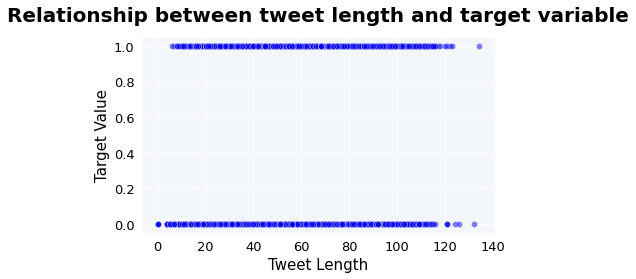

In [15]:
#  a scatter plot of the relationship between the length of the text data and the target variable

sns.set_style("darkgrid")
ax = sns.scatterplot(data=train, x='length', y='target', color='blue', alpha=0.5)
ax.set_facecolor("#F3F6FB")

plt.title(
    'Relationship between tweet length and target variable',
    fontsize=20,
    fontweight='bold',
    y=1.05,
    color='black',
)
plt.xlabel('Tweet Length', fontsize=15, color='black')
plt.ylabel('Target Value', fontsize=15, color='black')
plt.xticks(fontsize=13, color='black')
plt.yticks(fontsize=13, color='black')

plt.tight_layout()

plt.show()

#### a heatmap of the correlation matrix to check for any correlations between the features

Now let's plot a heatmap of the correlation matrix to check for any correlations between the features.

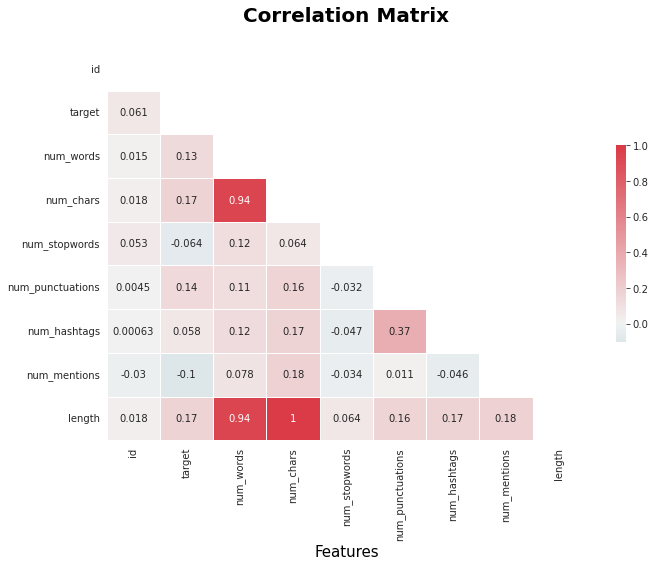

In [16]:
# a heatmap of the correlation matrix to check for any correlations between the features


sns.set_style("white")

fig, ax = plt.subplots(figsize=(10, 8))

mask = np.zeros_like(train.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    train.corr(),
    annot=True,
    mask=mask,
    cmap=cmap,
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    ax=ax,
)

plt.title('Correlation Matrix', fontsize=20, fontweight='bold', y=1.05, color='black')
plt.xlabel('Features', fontsize=15, color='black')

plt.tight_layout()

plt.show()

## Converting the text data into vectors

In this section, we will convert the text data into vectors (word embeddings) using the `Glove` word embedding. GloVe (Global Vectors for Word Representation) is a word embedding method that aims to capture the meaning and context of words based on the co-occurrence of words within a large corpus. GloVe is a type of unsupervised learning method that represents words as vectors in a high-dimensional space. Each dimension of the vector corresponds to a specific semantic meaning of the word.

For example, consider the words "apple", "fruit", and "red". In a GloVe representation, the vectors for these words would be related to each other based on their context in a corpus. The vectors for "apple" and "fruit" would be close to each other because they often appear together, while the vector for "red" would be close to the vector for "apple" because red apples are a common concept. In this way, GloVe learns to capture the relationships between words and the semantic meanings that they convey.

### Create a vocabulary index 

Let's use `TextVectorization` to create a vocabulary index found in the training data

In [17]:
vectorizer = tf.keras.layers.TextVectorization(max_tokens=20_000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(train['text']).batch(128)
vectorizer.adapt(text_ds)

2023-02-11 09:23:41.102566: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-11 09:23:41.103485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-11 09:23:41.114140: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-11 09:23:41.115005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-11 09:23:41.115783: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

we can retrieve the computed vocabulary:

In [18]:
vectorizer.get_vocabulary()[:10]

['',
 '[UNK]',
 'like',
 'fire',
 'people',
 'news',
 'emergency',
 'disaster',
 'video',
 'police']

In [19]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

### Load pre-trained word embeddings 

Let's load the pre-trained word embeddings from the `Glove` word embedding. Here are the steps we will follow:

```bash
$ wget https://nlp.stanford.edu/data/glove.twitter.27B.zip
$ unzip -q glove.twitter.27B.zip
```



In [20]:
#!cd /kaggle/working/ && wget https://nlp.stanford.edu/data/glove.twitter.27B.zip && unzip -q glove.twitter.27B.zip

In [21]:
!ls

__notebook_source__.ipynb  glove.6B.zip		       glove.twitter.27B.zip
glove.6B.100d.txt	   glove.twitter.27B.100d.txt  my_dir
glove.6B.200d.txt	   glove.twitter.27B.200d.txt  submission.csv
glove.6B.300d.txt	   glove.twitter.27B.25d.txt
glove.6B.50d.txt	   glove.twitter.27B.50d.txt


In [22]:
path = pathlib.Path('./glove.twitter.27B.100d.txt').expanduser()
embeddings_index = {}
with open(path) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors.')

Found 1193514 word vectors.


Now let's prepare the embedding matrix. We will use the `Embedding` layer from Keras to create an embedding matrix. The embedding matrix will be a matrix of shape `(vocab_size, embedding_dim)` where each entry `i` contains the word vector representation of the `i`th word in the reference vocabulary (built during tokenization). Note that index 0 is not supposed to stand for any word or token — it's a placeholder.

In [23]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

print(f'Converted {hits} words ({misses} misses)')

Converted 11019 words (4895 misses)


Next, we will create an `Embedding` layer. We will set `trainable=False` so that the embedding matrix is not updated during training. This means that the embedding matrix will not be updated as we train the model. We will set `trainable=True` when we fine-tune the model.

In [24]:
embedding_layer = tf.keras.layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

### Build the model

Let's build the model. We will use the `Embedding` layer we created earlier as the first layer in the model. We will be using a recurrent neural network (RNN) to process the text data. We will use the `LSTM` layer as the first layer in the model. We will use the `GlobalAveragePooling1D` layer to average the vectors of the words in the tweet. We will use the `Dense` layer as the output layer. We will use the `sigmoid` activation function in the output layer because this is a binary classification problem.

In [25]:
# RNN model with 1 LSTM layers and 2 dense laymonitor=

model = tf.keras.Sequential(
    [
        vectorizer,
        embedding_layer,
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 200)               0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 100)          1591600   
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 128)          84480     
_________________________________________________________________
dropout (Dropout)            (None, 200, 128)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [26]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(
    train['text'],
    train['target'],
    batch_size=256,
    epochs=5,
    validation_split=0.2,
    callbacks=[stop_early],
)

Epoch 1/5


2023-02-11 09:24:08.939167: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


24/24 [==============================] - 6s 65ms/step - loss: 0.6687 - accuracy: 0.5823 - val_loss: 0.5680 - val_accuracy: 0.7669
Epoch 2/5
24/24 [==============================] - 1s 31ms/step - loss: 0.5419 - accuracy: 0.7445 - val_loss: 0.4631 - val_accuracy: 0.8030
Epoch 3/5
24/24 [==============================] - 1s 43ms/step - loss: 0.4996 - accuracy: 0.7860 - val_loss: 0.4438 - val_accuracy: 0.8089
Epoch 4/5
24/24 [==============================] - 1s 31ms/step - loss: 0.4689 - accuracy: 0.8031 - val_loss: 0.4438 - val_accuracy: 0.8155
Epoch 5/5
24/24 [==============================] - 1s 31ms/step - loss: 0.4695 - accuracy: 0.8030 - val_loss: 0.4329 - val_accuracy: 0.8096


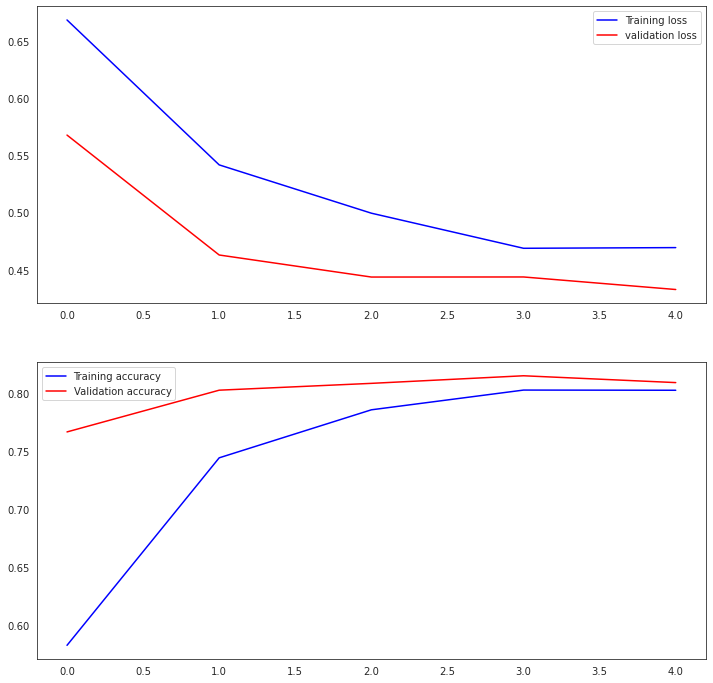

In [27]:
# Plot the loss and accuracy curves for training and validation

fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].plot(model.history.history['loss'], color='b', label="Training loss")
ax[0].plot(model.history.history['val_loss'], color='r', label="validation loss", axes=ax[0])
ax[0].legend()

ax[1].plot(model.history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(model.history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend()

plt.show()

In [44]:
from keras_tuner import Hyperband


def build_model(hp):
    model = tf.keras.Sequential(
        [
            vectorizer,
            embedding_layer,
            tf.keras.layers.Bidirectional(
                tf.keras.layers.LSTM(
                    hp.Int("num_units", min_value=32, max_value=128, step=16, default=64),
                    return_sequences=True,
                    recurrent_dropout=0.1,
                )
            ),
            tf.keras.layers.Dropout(
                hp.Float("dropout", min_value=0, max_value=0.9, step=0.1, default=0.5)
            ),
            tf.keras.layers.GlobalAveragePooling1D(),
            tf.keras.layers.Dense(
                hp.Int("num_units", min_value=32, max_value=128, step=16, default=64),
                activation=hp.Choice(
                    "activation", values=["relu", "tanh", "sigmoid"], default="relu"
                ),
            ),
            tf.keras.layers.Dense(1, activation='sigmoid'),
        ]
    )

    learning_rate = hp.Float("learning_rate", 1e-4, 1e-2, sampling="log", default=1e-3)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )
    return model


tuner = Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=3,
    factor=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [45]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_units (Int)
{'default': 64, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
dropout (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.1, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [46]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

tuner.search(
    train['text'],
    train['target'],
    batch_size=256,
    epochs=5,
    validation_split=0.2,
    callbacks=[stop_early],
)

Trial 8 Complete [00h 01m 50s]
val_accuracy: 0.7806959748268127

Best val_accuracy So Far: 0.8141825199127197
Total elapsed time: 00h 11m 37s


Now that the search is over, let's take a look at the best model. The model is saved at its best performing epoch (the epoch with the lowest validation loss).

In [47]:
# Get the top 2 models
models = tuner.get_best_models(num_models=2)

best_model = models[0]

# Build the model with the optimal hyperparameters and train it on the data for 5 epochs
best_model.build()
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 200)               0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 100)          1591600   
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 96)           57216     
_________________________________________________________________
dropout (Dropout)            (None, 200, 96)           0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 96)                0         
_________________________________________________________________
dense (Dense)                (None, 48)                4656      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4

In [48]:
# Let's print the results of the hyperparameter search
tuner.results_summary()

Results summary
Results in my_dir/helloworld
Showing 10 best trials
Trial summary
Hyperparameters:
num_units: 48
dropout: 0.2
activation: tanh
learning_rate: 0.0014796448394755802
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.8141825199127197
Trial summary
Hyperparameters:
num_units: 64
dropout: 0.30000000000000004
activation: tanh
learning_rate: 0.00220845836973479
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8102429509162903
Trial summary
Hyperparameters:
num_units: 64
dropout: 0.6000000000000001
activation: sigmoid
learning_rate: 0.0044980039478410595
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8017071485519409
Trial summary
Hyperparameters:
num_units: 96
dropout: 0.30000000000000004
activation: relu
learning_rate: 0.007884578039383288
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.7905449867248535
Trial summary
Hyperparameters:
num_units: 48
drop

## Results and Analysis 


| Trial ID | num_units | dropout | activation | learning_rate | epochs | initial_epoch | bracket | round | Score |
|----------|-----------|---------|------------|---------------|--------|---------------|---------|-------|-------|
| 48       | 0.2       | tanh    | 0.00147964 | 2             | 0      | 1             | 0       | 0.814 |       |
| 64       | 0.3       | tanh    | 0.00220846 | 3             | 0      | 0             | 0       | 0.810 |       |
| 64       | 0.6       | sigmoid | 0.00449800 | 3             | 0      | 0             | 0       | 0.802 |       |
| 96       | 0.3       | relu    | 0.00788458 | 2             | 0      | 1             | 0       | 0.791 |       |
| 48       | 0.2       | tanh    | 0.00147964 | 3             | 2      | 1             | 1       | 0.785 |       |
| 64       | 0.4       | sigmoid | 0.00156116 | 3             | 0      | 0             | 0       | 0.781 |       |
| 96       | 0.3       | relu    | 0.00788458 | 3             | 2      | 1             | 1       | 0.729 |       |
| 48       | 0.4       | sigmoid | 0.00075395 | 2             | 0      | 1             | 0       | 0.698 |       |



The results summary shows the outcomes of different trials using different hyperparameters for a machine learning model. The objective of the tuning process was to find the combination of hyperparameters that result in the best performance of the model, as measured by the "Score" metric.

Based on the results, it appears that the highest score of 0.8141825199127197 was achieved when the number of units was set to 48, dropout was 0.2, activation was tanh, learning rate was 0.0014796448394755802, and the model was trained for 2 epochs. This suggests that these hyperparameters may be a good starting point for further optimization.

However, it is also evident from the results that the score can vary greatly even with small changes to the hyperparameters. For example, increasing the number of units from 48 to 64 decreased the score from 0.814 to 0.810. Similarly, increasing the dropout from 0.2 to 0.3 decreased the score. This highlights the need for careful and systematic exploration of the hyperparameter space.

A possible next step in the optimization process would be to continue tuning the hyperparameters in a more fine-grained manner. For example, one could explore different activation functions, try different combinations of dropout and number of units, or vary the learning rate over a smaller range. It may also be useful to increase the number of epochs to give the model more time to learn.

In conclusion, while the results provide a good starting point, further optimization is likely needed to achieve the best performance.

In [53]:
# let's retrain the model with the best hyperparameters

best_model.fit(train['text'], train['target'], batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
48/48 [==============================] - 69s 1s/step - loss: 0.3853 - accuracy: 0.8343 - val_loss: 0.4502 - val_accuracy: 0.8030
Epoch 2/5
48/48 [==============================] - 69s 1s/step - loss: 0.3683 - accuracy: 0.8432 - val_loss: 0.4722 - val_accuracy: 0.8076
Epoch 3/5
48/48 [==============================] - 70s 1s/step - loss: 0.3420 - accuracy: 0.8563 - val_loss: 0.4682 - val_accuracy: 0.8017
Epoch 4/5
48/48 [==============================] - 70s 1s/step - loss: 0.3301 - accuracy: 0.8635 - val_loss: 0.5069 - val_accuracy: 0.8024
Epoch 5/5
48/48 [==============================] - 70s 1s/step - loss: 0.3061 - accuracy: 0.8754 - val_loss: 0.4874 - val_accuracy: 0.7892


Let's plot the training and validation loss and accuracies.

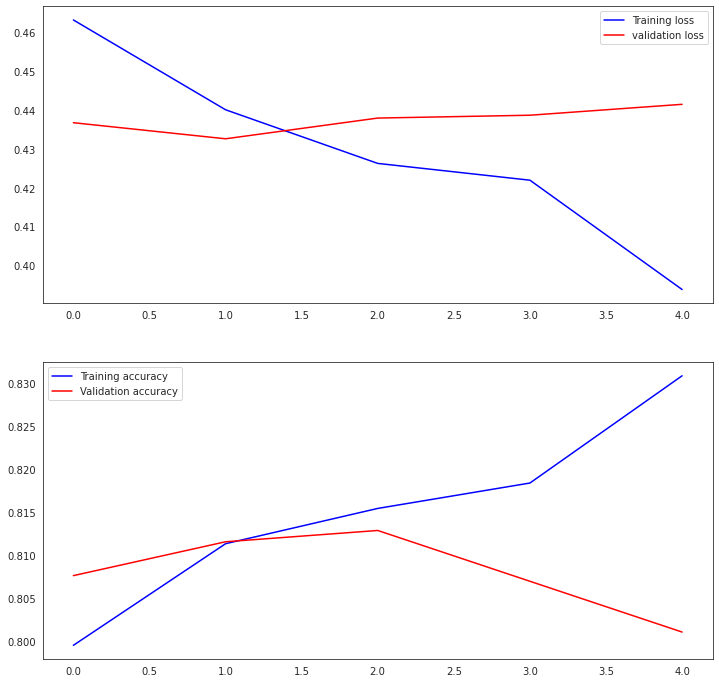

In [50]:
# Plot the loss and accuracy curves for training and validation for the best model

fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].plot(best_model.history.history['loss'], color='b', label="Training loss")
ax[0].plot(best_model.history.history['val_loss'], color='r', label="validation loss", axes=ax[0])
ax[0].legend()

ax[1].plot(best_model.history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(best_model.history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend()

plt.show()

In [51]:
# Predict on the test data

predictions = model.predict(test['text'])
predictions = np.round(predictions).astype(int).reshape(3263)

# Create a submission file

submission = pd.DataFrame({'id': test['id'], 'target': predictions})
submission.to_csv('submission.csv', index=False)

## Conclusion


In terms of takeaways, it appears that the choice of activation function, learning rate, and number of units are important factors in determining model performance. It may be worth exploring alternative activation functions and adjusting the learning rate and number of units further to see if there is any improvement in performance. It could also be useful to try different architectures and methods for regularization to see if they lead to better performance.

In the future, it may be useful to try more extensive hyperparameter tuning, perhaps by using different optimization algorithms or searching over a larger hyperparameter space. Additionally, it may be helpful to gather more data to improve the robustness of the models.